<a href="https://colab.research.google.com/github/mekazanc/DataProcessing/blob/main/DataExploration1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data by wget command from the dropbox. Note that you can create a link for a file in the Dropbox to receive such a file.

In [1]:
!wget -O train.csv https://www.dropbox.com/s/va9i1tfmsuvkx4r/train.csv?dl=0

--2020-10-13 09:56:44--  https://www.dropbox.com/s/va9i1tfmsuvkx4r/train.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6032:1::a27d:5201
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/va9i1tfmsuvkx4r/train.csv [following]
--2020-10-13 09:56:44--  https://www.dropbox.com/s/raw/va9i1tfmsuvkx4r/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6544461a0117ddd0ccd0a4eb53.dl.dropboxusercontent.com/cd/0/inline/BBKrUrJ2akShMOmh4ay7fN4kyaQ5zf-47HHI-n3y46EdhPhb552f5wWAG2xJFmUP6IoDnNBuu7YAbbgwb8RhjXp50BwIx96Q3ClFg4GkB5bnYPAO9KqqSjGPlHu2IXtx9n0/file# [following]
--2020-10-13 09:56:45--  https://uc6544461a0117ddd0ccd0a4eb53.dl.dropboxusercontent.com/cd/0/inline/BBKrUrJ2akShMOmh4ay7fN4kyaQ5zf-47HHI-n3y46EdhPhb552f5wWAG2xJFmUP6IoDnNBuu7YAbbgwb8RhjXp50BwIx96Q3ClFg4GkB5bnYPAO9Kq

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
color = sns.color_palette()
sns.set_style('ticks')
import numpy as np
from scipy import stats
from scipy.stats import norm, skew #for some statistics

Load Data

In [7]:
train = pd.read_csv("train.csv")
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Shape of the Data

In [8]:
#check the numbers of samples and features
print("The train data size is : {} ".format(train.shape))

The train data size is : (1460, 81) 


Plot given feature wrt target column

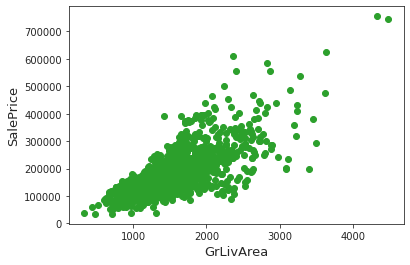

In [30]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'], c = '#2ca02c')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

You can also create grid-based plots. 

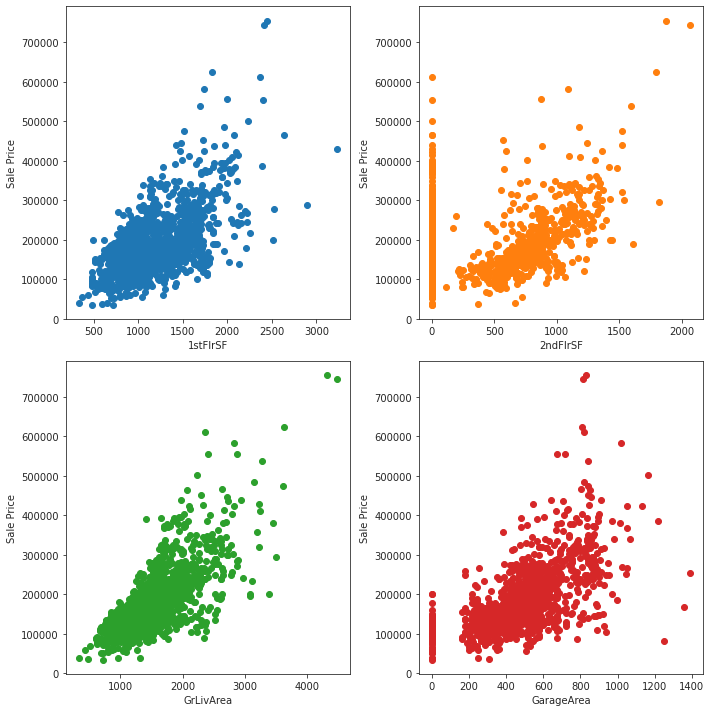

In [31]:
#  I suppose that there are even number of features. You need to change nrows and ncols if required. 
plotList = [ '1stFlrSF' ,'2ndFlrSF' ,'GrLivArea' ,'GarageArea']
colorList =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
target = 'SalePrice'

n = int(len(plotList)/2)
ndx = 0 
 
fig, ax = plt.subplots(nrows=n, ncols=n,figsize=(10,10))


for row in ax:
    for col in row:
        col.scatter(x = train[plotList[ndx]], y = train[target], c = colorList[ndx] )
        col.set_xlabel(plotList[ndx])
        col.set_ylabel('Sale Price')
        ndx=ndx+1 

plt.tight_layout()
plt.show()

Dropping Some Rows of the given Features

>>>>>>> NO PROCESSING APPLIED...! 


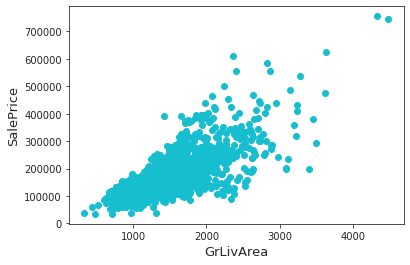

>>>>>>> PROCESSING APPLIED...! 


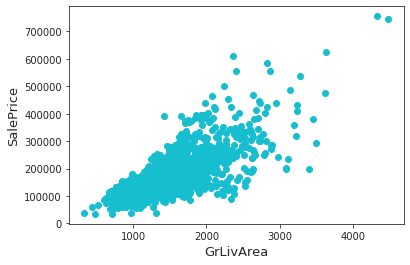

In [36]:
# Deleting outliers
print(">>>>>>> NO PROCESSING APPLIED...! ")
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'], c = '#17becf')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

print(">>>>>>> PROCESSING APPLIED...! ")
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'], c = '#17becf')
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Feature Statistics : This will help to see the percentage of null instances in every feature. 

In [43]:
# find percentage of non-zero elements of each feature vector. 
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head(10)

,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageYrBlt,5.555556
GarageType,5.555556
GarageFinish,5.555556
GarageQual,5.555556


Text(0.5, 1.0, 'Percent missing data by feature')

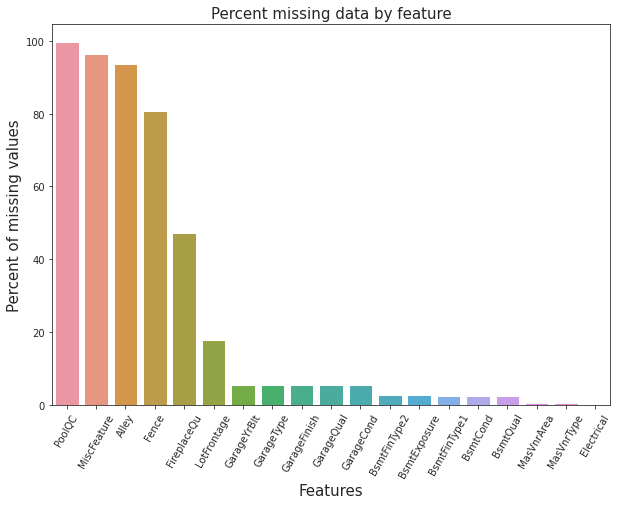

In [47]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='60')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [46]:
# Value_counts is another helpful method to see number of occurances. 
train["LotFrontage"].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [48]:
# To Fill features with a specific methods you can use below commands
# 1. Fill PoolQC with None that means no pool 
train["PoolQC"] = train["PoolQC"].fillna("None")

# 2. Drop GarageYrBlt feature from the training data
train.drop(['GarageYrBlt'], axis=1, inplace=True)

# 3. Fill BsmtFinSF1 with Zero 
train["BsmtFinSF1"] = train["BsmtFinSF1"].fillna(0)
 
# 4. Fill MSZoning with the most common category.  
train["MSZoning"] = train["MSZoning"].fillna(train['MSZoning'].mode()[0])
 
